In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
df_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [39]:
# df_test.info()
# df_train.info()
df_train.head(1)
# df_train.describe()
# df_test.describe()


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['6']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '6'}, axis=1)
              .sort_values('6', ascending=True))
  xs = counted['6']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('6', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('6')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '0'}, axis=1)
              .sort_values('0', ascending=True))
  xs = counted['0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['0.1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '0.1'}, axis=1)
              .sort_values('0.1', ascending=True))
  xs = counted['0.1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('0.1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0.1')
_ = plt.ylabel('count()')

Columns in X (training features): ['0', '0.1', '0.2', '0.3', '0.4']...['0.586', '0.587', '0.588', '0.589', '0.590']
Columns in X_test (test features): ['0', '0.1', '0.2', '0.3', '0.4']...['0.663', '0.664', '0.665', '0.666', '0.667']
The True label for the image is 1


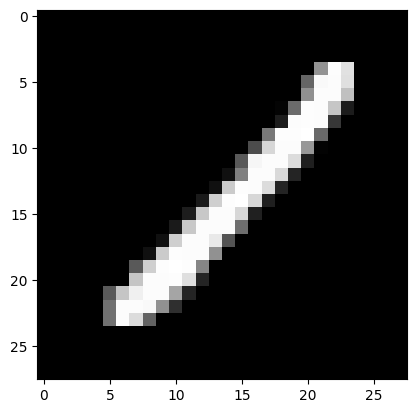

In [40]:
X = df_train.drop("6" , axis=1)
y = df_train["6"]
X_test = df_test.drop("7" , axis=1)
y_test = df_test["7"]

X = X / 255.0
X_test = X_test/255.0

print(f"Columns in X (training features): {X.columns.tolist()[:5]}...{X.columns.tolist()[-5:]}")
print(f"Columns in X_test (test features): {X_test.columns.tolist()[:5]}...{X_test.columns.tolist()[-5:]}")

idx = 255
img = X.iloc[idx].values.reshape(28,28)
print(f"The True label for the image is {y[idx]}")
plt.imshow(img , cmap="gray")
plt.show()

In [41]:
pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X)
X_train_PCA_full = np.hstack((X_train_PCA , y.values.reshape(-1,1)))
PCA_df = pd.DataFrame(X_train_PCA_full , columns=["PC1" , "PC2" , "target"])


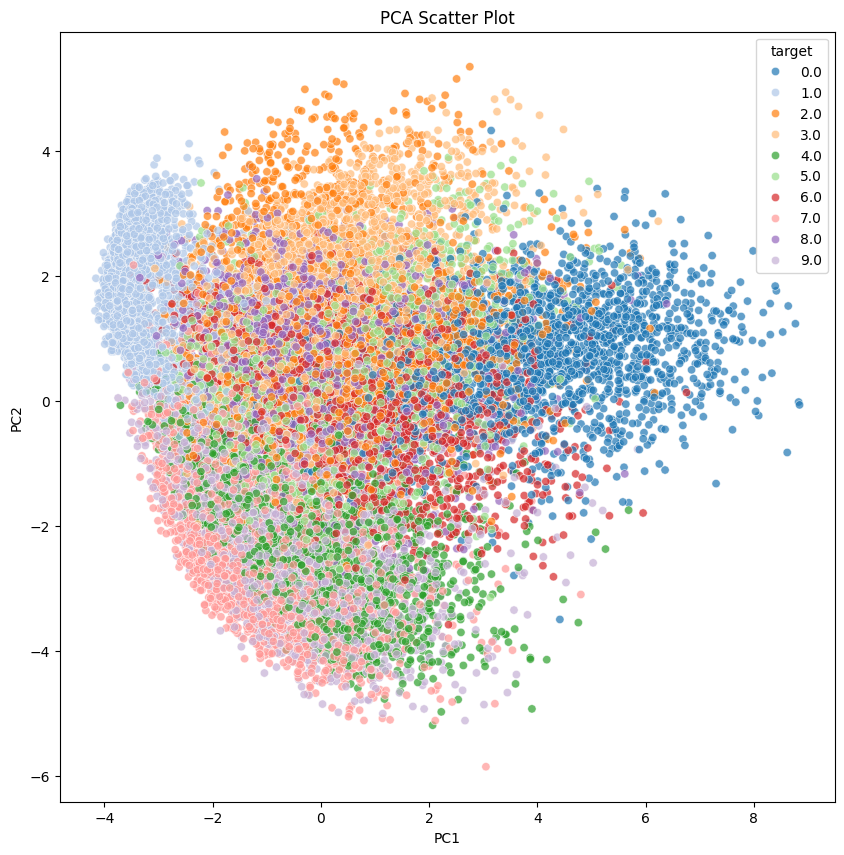

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
palette = sns.color_palette("tab20", n_colors=PCA_df["target"].nunique())
sns.scatterplot(
    data=PCA_df,
    x="PC1",
    y="PC2",
    hue="target",
    palette=palette,
    alpha=0.7
)
plt.title("PCA Scatter Plot")
plt.show()


In [45]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X.values , y )
prediction = model.predict(X_test.values)
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9591
F1 Score: 0.9590
